## Generate separate position (wr, rb, qb) dataframes and create CSV for 3 train/test models to generate fantasy point forecast given a matchup and recent history

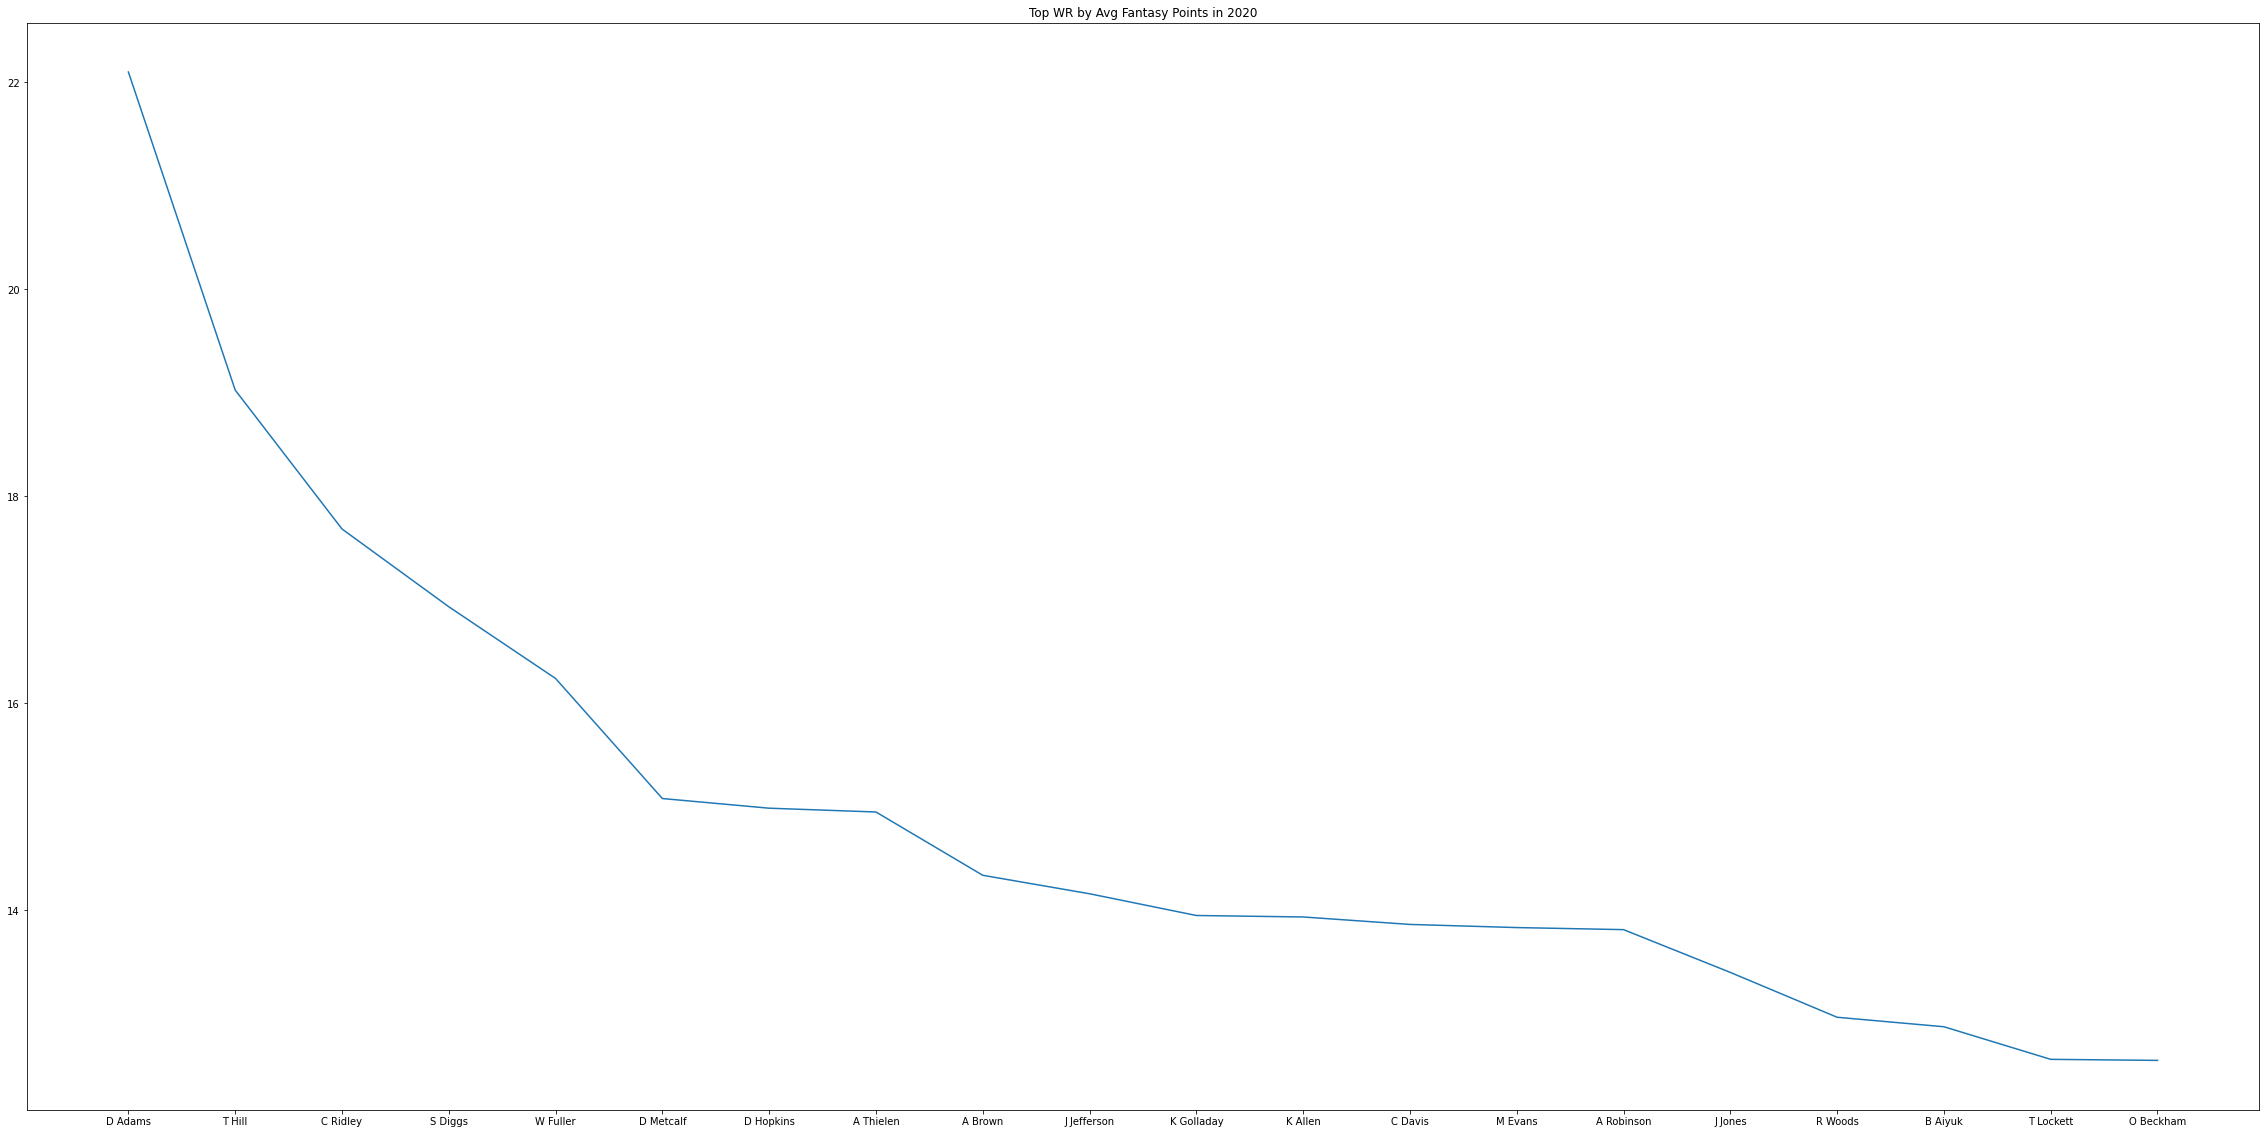

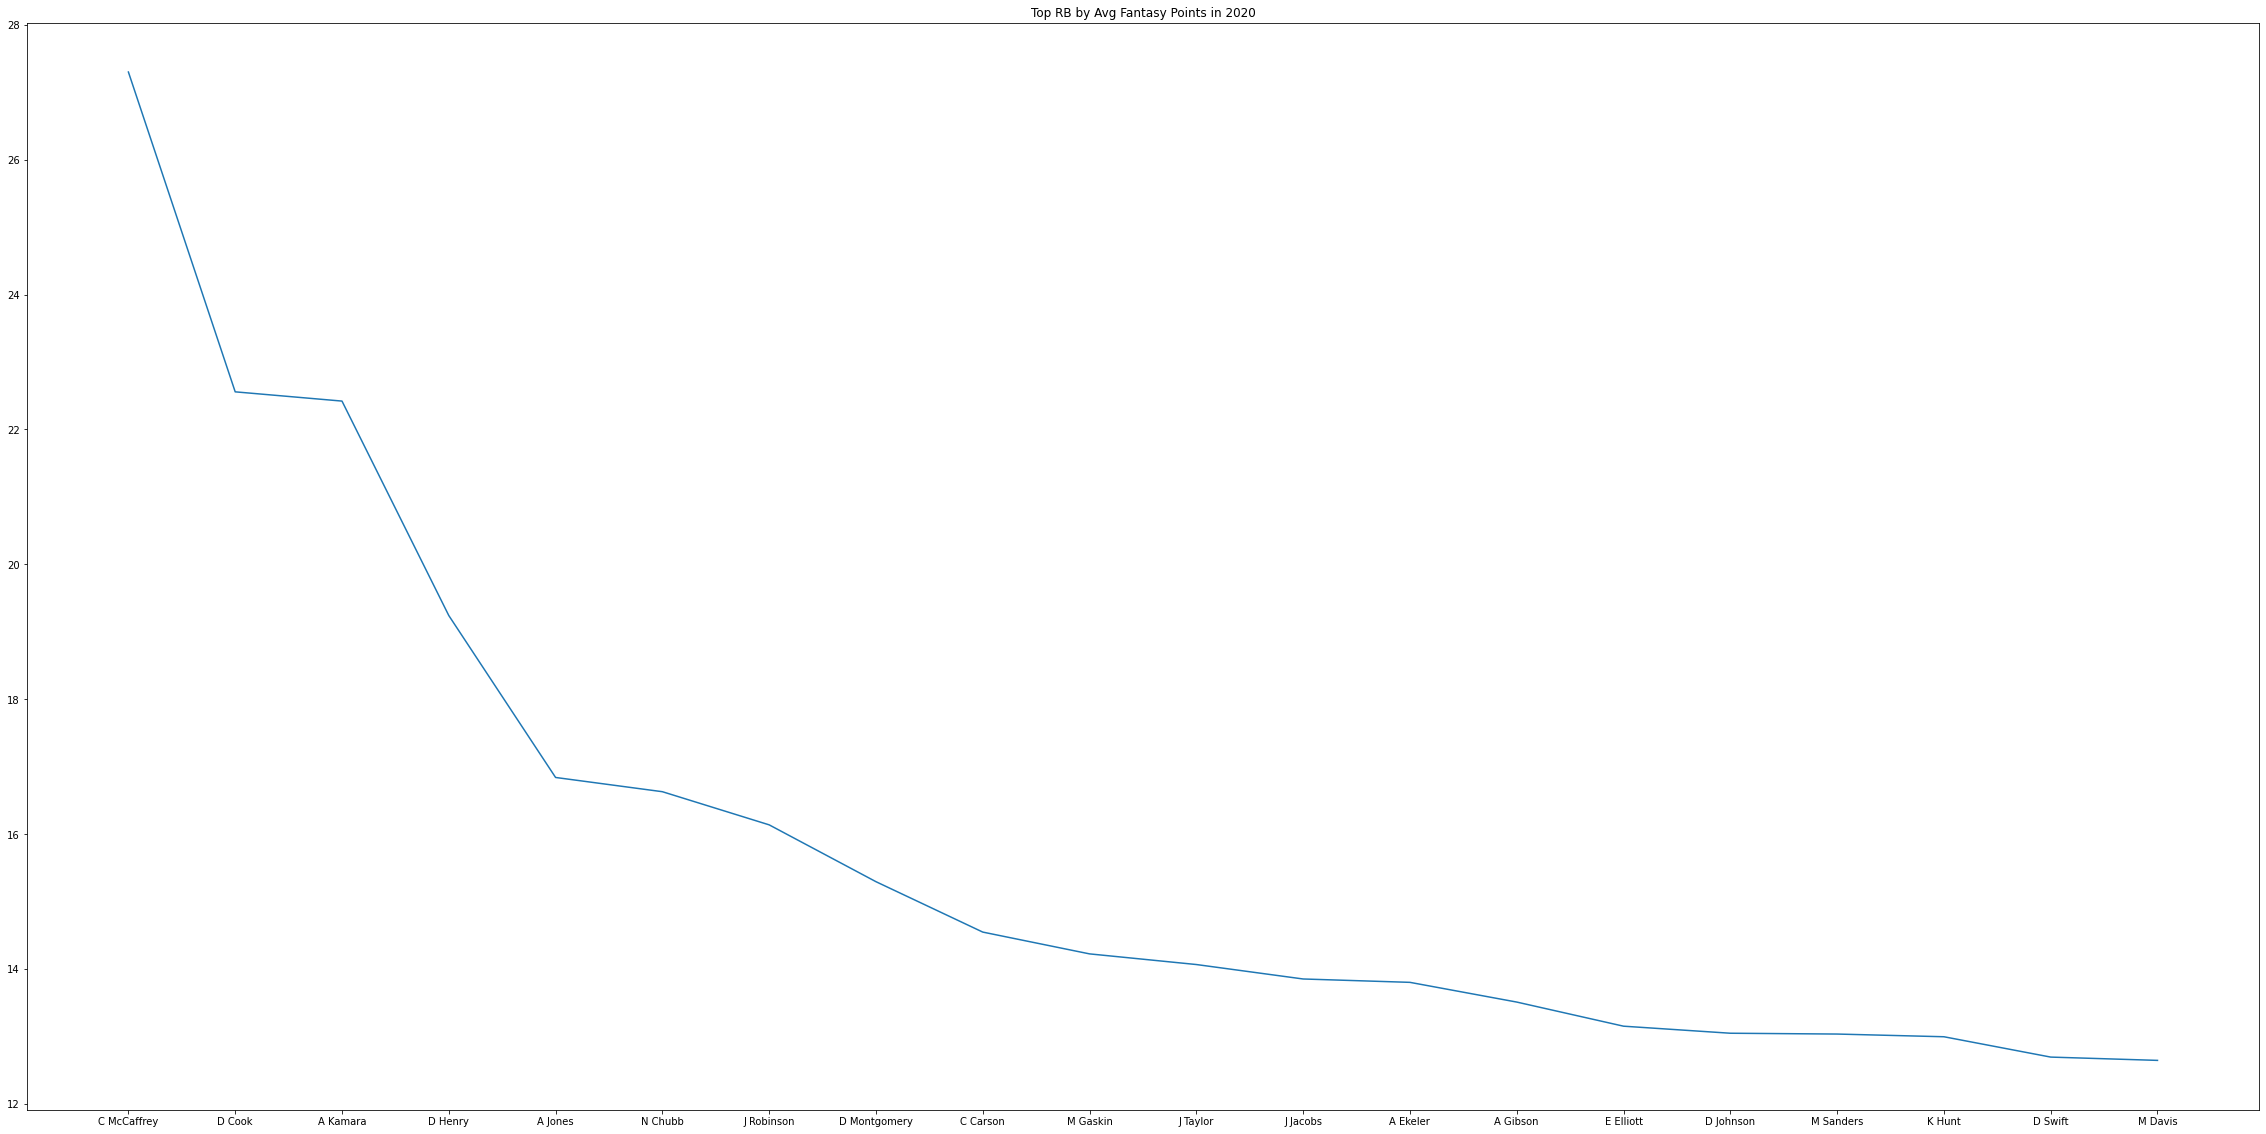

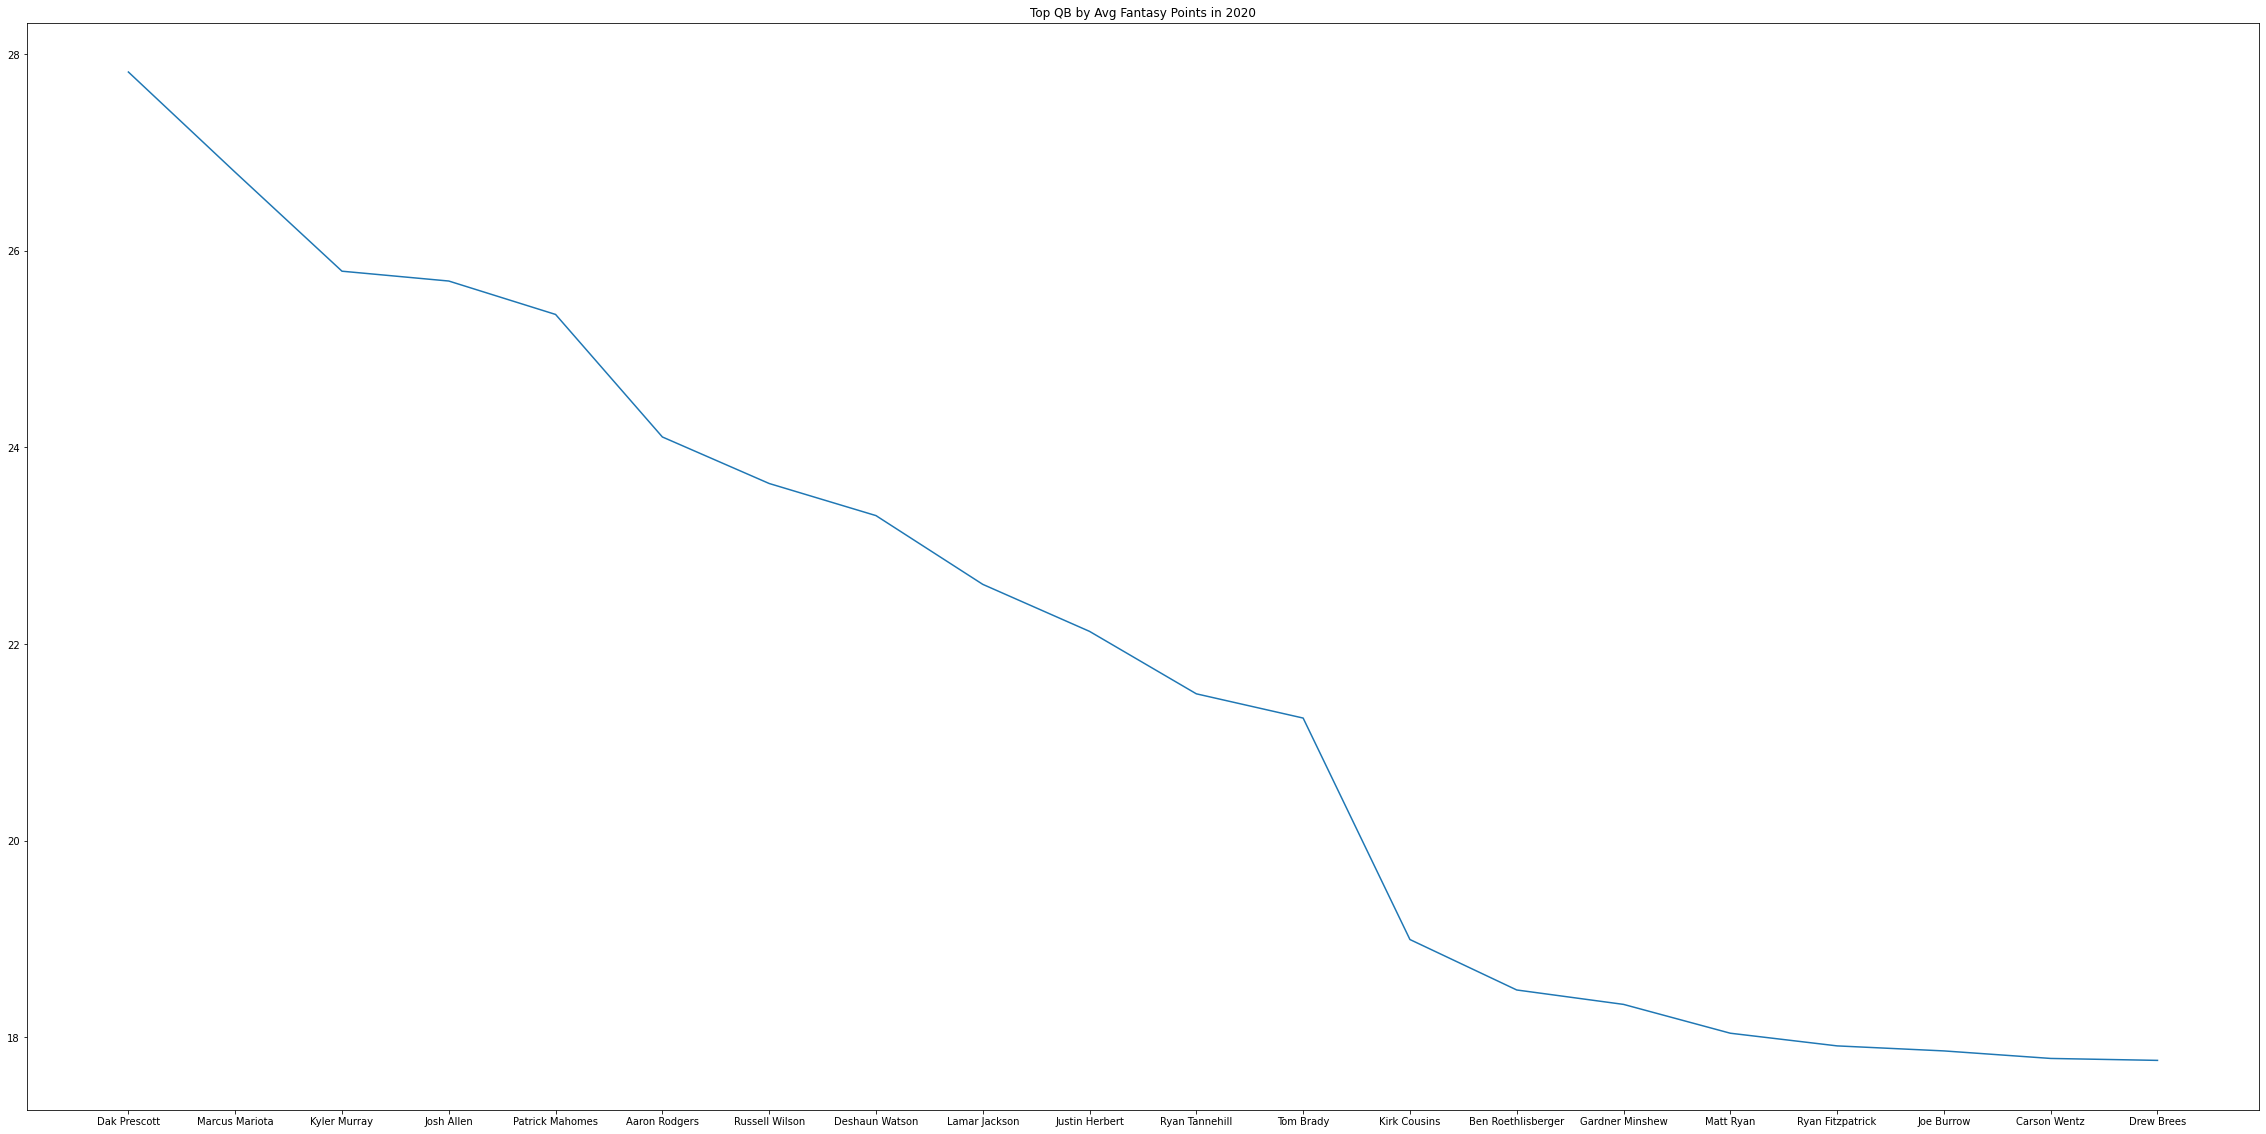

In [4]:

# import packages
import pandas as pd
import matplotlib.pyplot as py
from matplotlib.pylab import rcParams

# read in the full_database csv that contains the merged defnese and offensive dataframes generated in the full_database.ipynb script
# each rown in the 'full_database.csv' contains the results of a unique matchup of player vs defensive in addition their previoius 3 games scores/stats 
df = pd.read_csv('full_database.csv')

# generate separate dataframes for the rbs, wrs and qbs
rb_df = df[df.Pos == 'RB']
wr_df = df[df.Pos == 'WR']
qb_df = df[df.Pos == 'QB']

# list of unique qb's
unique_qb = []
for x in list(qb_df.Name):
    if x not in unique_qb:
        unique_qb.append(x)

# dataframe of unique qb's and thier fantasy point averages
qb_averages = pd.DataFrame(columns = ['Name', 'Average'], index = range(len(unique_qb)))
for i in range(len(unique_qb)):
    temp_qb = df[df.Name == unique_qb[i]]
    ffp = temp_qb.FD_points.sum()/len(temp_qb)
    qb_averages.Average[i] = (ffp)
    qb_averages.Name[i] = unique_qb[i]

# qb dataframe of 2020 stats sorted by qb average fantasy points
qb_2020 = qb_averages.sort_values('Average', ascending = False)

# list of unique rb's
unique_rb = []
for x in list(rb_df.Name):
    if x not in unique_rb:
        unique_rb.append(x)
# dataframe of unique rb's and their fantasy point averages
rb_averages = pd.DataFrame(columns = ['Name', 'Average'], index = range(len(unique_rb)))
for i in range(len(unique_rb)):
    temp_rb = df[df.Name == unique_rb[i]]
    ffp = temp_rb.FD_points.sum()/len(temp_rb)
    rb_averages.Average[i] = (ffp)
    rb_averages.Name[i] = unique_rb[i]

# rb dataframe of 2020 stats sorted by rb average fantasy points
rb_2020 = rb_averages.sort_values('Average', ascending = False)

# list of unique wr's
unique_wr = []
for x in list(wr_df.Name):
    if x not in unique_wr:
        unique_wr.append(x)

# dataframe of unique wr's and their fantasy point aveages
wr_averages = pd.DataFrame(columns = ['Name', 'Average'], index = range(len(unique_wr)))
for i in range(len(unique_wr)):
    temp_wr = df[df.Name == unique_wr[i]]
    ffp = temp_wr.FD_points.sum()/len(temp_wr)
    wr_averages.Average[i] = (ffp)
    wr_averages.Name[i] = unique_wr[i]

# wr dataframe of 2020 stats sorted by wr average fantasy points
wr_2020 = wr_averages.sort_values('Average', ascending = False)

# function to show the list game history of a quarterback given a portion of the qb's name as the function input
def qb_games(qb):
    qb_history = qb_df[qb_df.Name.str.contains(qb)]
    print(qb_history)

# function to show the list game history of a runningback given a portion of the qb's name as the function input
def rb_games(rb):
    rb_history = rb_df[rb_df.Name.str.contains(rb)]
    print(rb_history)

# function to show the list game history of a wide reciever given a portion of the qb's name as the function input
def wr_games(wr):
    wr_history = wr_df[wr_df.Name.str.contains(wr)]
    print(wr_history)

# Function to list the game history of any player given a portion of the players name as the function input
# this will return more than 1 individual player if a common first name is given, but accepts first, last, or both names.
def games(any_player):
    player_history = df[df.Name.str.contains(any_player)]
    player_history.index = pd.to_datetime(player_history.Date)
    player_history.drop(columns='Date', inplace = True)

    #rcParams['figure.figsize'] = 20,10
    #py.plot(player_history.Date,player_history.FD_points)
    #py.show()
    #player_history.index = player_history.Date
    #player_history.drop(columns=['Date'], inplace=True)
    return player_history[::-1]

# compare the fantasy point history between two players given by the user as strings
def playerComparison(name1,name2):
    # player 1 history
    player_history1 = df[df.Name.str.contains(name1)]
    player_history1.index = pd.to_datetime(player_history1.Date)
    player_history1.drop(columns='Date', inplace = True)
    
    # player 2 history
    player_history2 = df[df.Name.str.contains(name2)]
    player_history2.index = pd.to_datetime(player_history2.Date)
    player_history2.drop(columns='Date', inplace = True)

    # plot the comparison
    rcParams['figure.figsize'] = 20,10
    py.plot(player_history1.FD_points, label = name1)
    py.plot(player_history2.FD_points, label = name2)
    py.legend()
    py.title(name1 + ' vs. ' + name2)
    py.show()
    
    return player_history1, player_history2
###################################################################################

# view top 20 WR player (considered WR1's)
names = []
for x in wr_2020.Name.head(20):
    names.append(x.split()[:-1])
abbvName = [(list(x[0])[0] + ' ' + x[1]) for x in names]
rcParams['figure.figsize'] = 40,20
py.plot(abbvName,wr_2020.Average.head(20))
py.title('Top WR by Avg Fantasy Points in 2020')
py.show()

# view top 20 RB players (RB1's)
names = []
for x in rb_2020.Name.head(20):
    names.append(x.split()[:-1])
abbvName = [(list(x[0])[0] + ' ' + x[1]) for x in names]
rcParams['figure.figsize'] = 40,20
py.plot(abbvName,rb_2020.Average.head(20))
py.title('Top RB by Avg Fantasy Points in 2020')
py.show()

# view top 20 QB players (QB1's)
names = []
for x in qb_2020.Name.head(20):
    names.append(x.split()[:-1])
abbvName = [(x[0] + ' ' + x[1]) for x in names]
rcParams['figure.figsize'] = 40,20
py.plot(abbvName,qb_2020.Average.head(20))
py.title('Top QB by Avg Fantasy Points in 2020')
py.show()

##############################################################################
# generate the csv file for the WR LSTM model
##############################################################################

# dataframes of top WRs for model projections
wrKeys = wr_2020.Name.head(20)

# columns to pull for each player
teams = []
opp = []
name = []
pos = []
FD_points = []
Key = []
Date = []
first_downs = []
TotYd = []
PassY = []
RushY = []
TO = []
day = []
kickoff = []
locations = []
Defense = []
ffp1 = []
ffp2 = []
ffp3 = []
tot1 = []
tot2 = []
tot3 = []
pass1 = []
pass2 = []
pass3 = []
russ1 = []
russ2 = []
russ3 = []

# filter to find the above values for each of the top 20 WR's
columns = df.columns
wrGames = pd.DataFrame(columns = columns)
for x in wrKeys:
    for i in range(len(df)):
        if  x == df.Name[i]:
            temp = df.iloc[i,:]
            teams.append(temp.Team)
            opp.append(temp.Opp)
            name.append(temp.Name)
            pos.append(temp.Pos)
            FD_points.append(temp.FD_points)
            Key.append(temp.Key)
            Date.append(temp.Date)
            first_downs.append(temp.first_downs)
            TotYd.append(temp.TotYd)
            PassY.append(temp.PassY)
            RushY.append(temp.RushY)
            TO.append(temp.TO)
            day.append(temp.day)
            kickoff.append(temp.kickoff)
            locations.append(temp.location)
            Defense.append(temp.Defense)
            ffp1.append(temp.FFP_lag1)
            ffp2.append(temp.FFP_lag2)
            ffp3.append(temp.FFP_lag3)
            tot1.append(temp.Tot_lag1)
            tot2.append(temp.Tot_lag2)
            tot3.append(temp.Tot_lag3)
            pass1.append(temp.Pass_lag1)
            pass2.append(temp.Pass_lag2)
            pass3.append(temp.Pass_lag3)
            russ1.append(temp.Russ_lag1)
            russ2.append(temp.Russ_lag2)
            russ3.append(temp.Russ_lag3)

# Turn the appended lists below into a best WR's dataframe
# This dataframe can be use to train/test a model for WR1's (Projections for top 20 WRS).
# Note - if we picked 20 through 40 this would be a df for WR2's (Projection for second tier WRs)
        
bestWrs = pd.DataFrame(columns = df.columns, index = range(len(locations)))
bestWrs.Team = teams
bestWrs.Opp = opp
bestWrs.Name = name
bestWrs.Pos = pos
bestWrs.FD_points = FD_points
bestWrs.Key = Key
bestWrs.Date = Date
bestWrs.first_downs = first_downs
bestWrs.TotYd = TotYd
bestWrs.PassY = PassY
bestWrs.RushY = RushY
bestWrs.TO = TO
bestWrs.day = day
bestWrs.kickoff = kickoff
bestWrs.location = locations
bestWrs.Defense = Defense
bestWrs.FFP_lag1 = ffp1
bestWrs.FFP_lag2 = ffp2
bestWrs.FFP_lag3 = ffp3
bestWrs.Tot_lag1 = tot1
bestWrs.Tot_lag2 = tot2
bestWrs.Tot_lag3 = tot3
bestWrs.Pass_lag1 = pass1
bestWrs.Pass_lag2 = pass2
bestWrs.Pass_lag3 = pass3
bestWrs.Russ_lag1 = russ1
bestWrs.Russ_lag2 = russ2
bestWrs.Russ_lag3 = russ3
bestWrs.drop(columns = ['Unnamed: 0'], inplace=True) # drop unused columns

# best wr data to a csv for model building of WR1's)
bestWrs.to_csv('bestWrs.csv')

##############################################################################
# generate the csv file for the RB LSTM model
##############################################################################

# dataframes of top WRs for model projections
rbKeys = rb_2020.Name.head(20)

# columns to pull for each player
teams = []
opp = []
name = []
pos = []
FD_points = []
Key = []
Date = []
first_downs = []
TotYd = []
PassY = []
RushY = []
TO = []
day = []
kickoff = []
locations = []
Defense = []
ffp1 = []
ffp2 = []
ffp3 = []
tot1 = []
tot2 = []
tot3 = []
pass1 = []
pass2 = []
pass3 = []
russ1 = []
russ2 = []
russ3 = []

# filter to find the above values for each of the top 20 RB's
columns = df.columns
rbGames = pd.DataFrame(columns = columns)
for x in rbKeys:
    for i in range(len(df)):
        if  x == df.Name[i]:
            temp = df.iloc[i,:]
            teams.append(temp.Team)
            opp.append(temp.Opp)
            name.append(temp.Name)
            pos.append(temp.Pos)
            FD_points.append(temp.FD_points)
            Key.append(temp.Key)
            Date.append(temp.Date)
            first_downs.append(temp.first_downs)
            TotYd.append(temp.TotYd)
            PassY.append(temp.PassY)
            RushY.append(temp.RushY)
            TO.append(temp.TO)
            day.append(temp.day)
            kickoff.append(temp.kickoff)
            locations.append(temp.location)
            Defense.append(temp.Defense)
            ffp1.append(temp.FFP_lag1)
            ffp2.append(temp.FFP_lag2)
            ffp3.append(temp.FFP_lag3)
            tot1.append(temp.Tot_lag1)
            tot2.append(temp.Tot_lag2)
            tot3.append(temp.Tot_lag3)
            pass1.append(temp.Pass_lag1)
            pass2.append(temp.Pass_lag2)
            pass3.append(temp.Pass_lag3)
            russ1.append(temp.Russ_lag1)
            russ2.append(temp.Russ_lag2)
            russ3.append(temp.Russ_lag3)

# Turn the appended lists below into a best RB's dataframe
# This dataframe can be use to train/test a model for RB1's (Projections for top 20 RB's).
# Note - if we picked 20 through 40 this would be a df for RB2's (Projection for second tier RBs)
        
bestRbs = pd.DataFrame(columns = df.columns, index = range(len(locations)))
bestRbs.Team = teams
bestRbs.Opp = opp
bestRbs.Name = name
bestRbs.Pos = pos
bestRbs.FD_points = FD_points
bestRbs.Key = Key
bestRbs.Date = Date
bestRbs.first_downs = first_downs
bestRbs.TotYd = TotYd
bestRbs.PassY = PassY
bestRbs.RushY = RushY
bestRbs.TO = TO
bestRbs.day = day
bestRbs.kickoff = kickoff
bestRbs.location = locations
bestRbs.Defense = Defense
bestRbs.FFP_lag1 = ffp1
bestRbs.FFP_lag2 = ffp2
bestRbs.FFP_lag3 = ffp3
bestRbs.Tot_lag1 = tot1
bestRbs.Tot_lag2 = tot2
bestRbs.Tot_lag3 = tot3
bestRbs.Pass_lag1 = pass1
bestRbs.Pass_lag2 = pass2
bestRbs.Pass_lag3 = pass3
bestRbs.Russ_lag1 = russ1
bestRbs.Russ_lag2 = russ2
bestRbs.Russ_lag3 = russ3
bestRbs.drop(columns = ['Unnamed: 0'], inplace=True) # drop unused columns

# best rb data to a csv for model building of RB1's)
bestRbs.to_csv('bestRbs.csv')

##############################################################################
# generate the csv file for the QB LSTM model
##############################################################################
# dataframes of top QBs for model projections
qbKeys = qb_2020.Name.head(20)

# columns to pull for each player
teams = []
opp = []
name = []
pos = []
FD_points = []
Key = []
Date = []
first_downs = []
TotYd = []
PassY = []
RushY = []
TO = []
day = []
kickoff = []
locations = []
Defense = []
ffp1 = []
ffp2 = []
ffp3 = []
tot1 = []
tot2 = []
tot3 = []
pass1 = []
pass2 = []
pass3 = []
russ1 = []
russ2 = []
russ3 = []

# filter to find the above values for each of the top 20 QB's
columns = df.columns
qbGames = pd.DataFrame(columns = columns)
for x in qbKeys:
    for i in range(len(df)):
        if  x == df.Name[i]:
            temp = df.iloc[i,:]
            teams.append(temp.Team)
            opp.append(temp.Opp)
            name.append(temp.Name)
            pos.append(temp.Pos)
            FD_points.append(temp.FD_points)
            Key.append(temp.Key)
            Date.append(temp.Date)
            first_downs.append(temp.first_downs)
            TotYd.append(temp.TotYd)
            PassY.append(temp.PassY)
            RushY.append(temp.RushY)
            TO.append(temp.TO)
            day.append(temp.day)
            kickoff.append(temp.kickoff)
            locations.append(temp.location)
            Defense.append(temp.Defense)
            ffp1.append(temp.FFP_lag1)
            ffp2.append(temp.FFP_lag2)
            ffp3.append(temp.FFP_lag3)
            tot1.append(temp.Tot_lag1)
            tot2.append(temp.Tot_lag2)
            tot3.append(temp.Tot_lag3)
            pass1.append(temp.Pass_lag1)
            pass2.append(temp.Pass_lag2)
            pass3.append(temp.Pass_lag3)
            russ1.append(temp.Russ_lag1)
            russ2.append(temp.Russ_lag2)
            russ3.append(temp.Russ_lag3)

# Turn the appended lists below into a best QB's dataframe
# This dataframe can be use to train/test a model for QB1's (Projections for top 20 QB's).
bestQbs = pd.DataFrame(columns = df.columns, index = range(len(locations)))
bestQbs.Team = teams
bestQbs.Opp = opp
bestQbs.Name = name
bestQbs.Pos = pos
bestQbs.FD_points = FD_points
bestQbs.Key = Key
bestQbs.Date = Date
bestQbs.first_downs = first_downs
bestQbs.TotYd = TotYd
bestQbs.PassY = PassY
bestQbs.RushY = RushY
bestQbs.TO = TO
bestQbs.day = day
bestQbs.kickoff = kickoff
bestQbs.location = locations
bestQbs.Defense = Defense
bestQbs.FFP_lag1 = ffp1
bestQbs.FFP_lag2 = ffp2
bestQbs.FFP_lag3 = ffp3
bestQbs.Tot_lag1 = tot1
bestQbs.Tot_lag2 = tot2
bestQbs.Tot_lag3 = tot3
bestQbs.Pass_lag1 = pass1
bestQbs.Pass_lag2 = pass2
bestQbs.Pass_lag3 = pass3
bestQbs.Russ_lag1 = russ1
bestQbs.Russ_lag2 = russ2
bestQbs.Russ_lag3 = russ3
bestQbs.drop(columns = ['Unnamed: 0'], inplace=True) # drop unused columns

# best qb data to a csv for model building of QB1's)
bestQbs.to_csv('bestQbs.csv') 